In [2]:
#iport necessarsy libaries
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [81]:
#Importing the CSV FILE
df_tele= pd.read_csv('TelcoCustomerChurn.csv')
print(df_tele)


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
5     9305-CDSKC  Female              0      No         No       8   
6     1452-KIOVK    Male              0      No        Yes      22   
7     6713-OKOMC  Female              0      No         No      10   
8     7892-POOKP  Female              0     Yes         No      28   
9     6388-TABGU    Male              0      No        Yes      62   
10    9763-GRSKD    Male              0     Yes        Yes      13   
11    7469-LKBCI    Male              0      No         No      16   
12    8091-TTVAX    Male              0     Yes         No      58   
13    0280-XJGEX    

In [83]:
#Gives some key deatils about our DataFrame
#df_tele.describe()

In [ ]:
#to check for any null or NaN values in the DF 
#df_tele.isnull().sum()

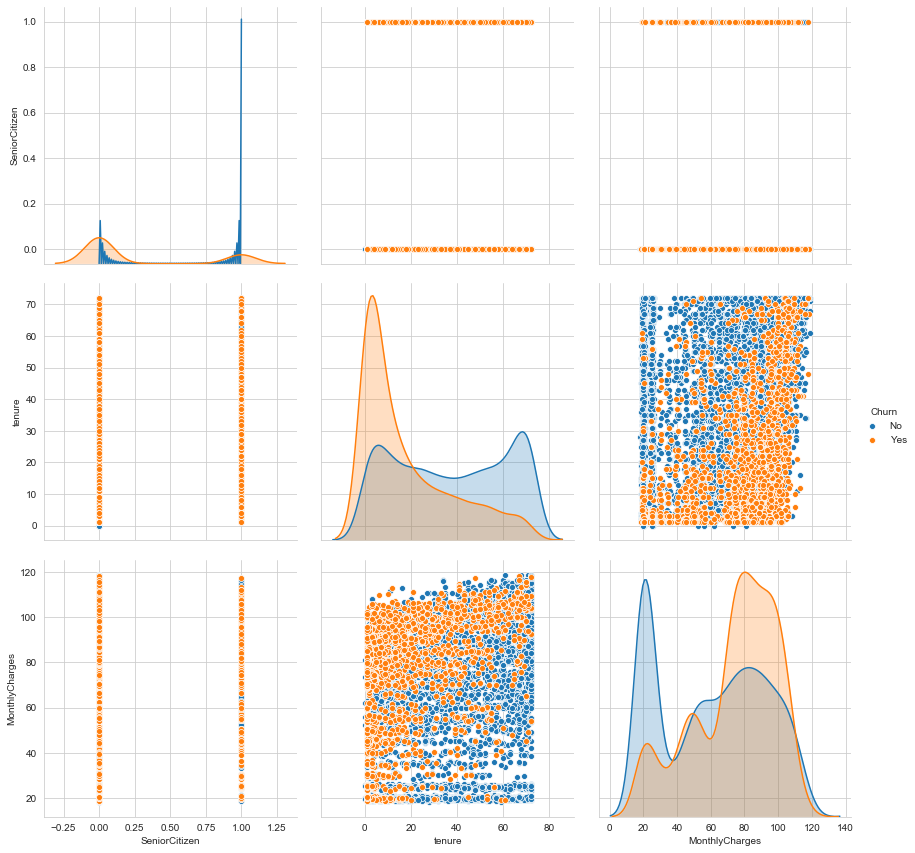

In [90]:
#2_d Scatter plot wiht color-coding for each feature type 
sns.set_style("whitegrid");
#sns.FacetGrid(banktrans, hue="Churn", size=10) \
 #   .map(plt.scatter,"MonthlyCharges","PaymentMethod") \
  #  .add_legend()
sns.pairplot(df_tele,hue="Churn",size=4);
plt.show();

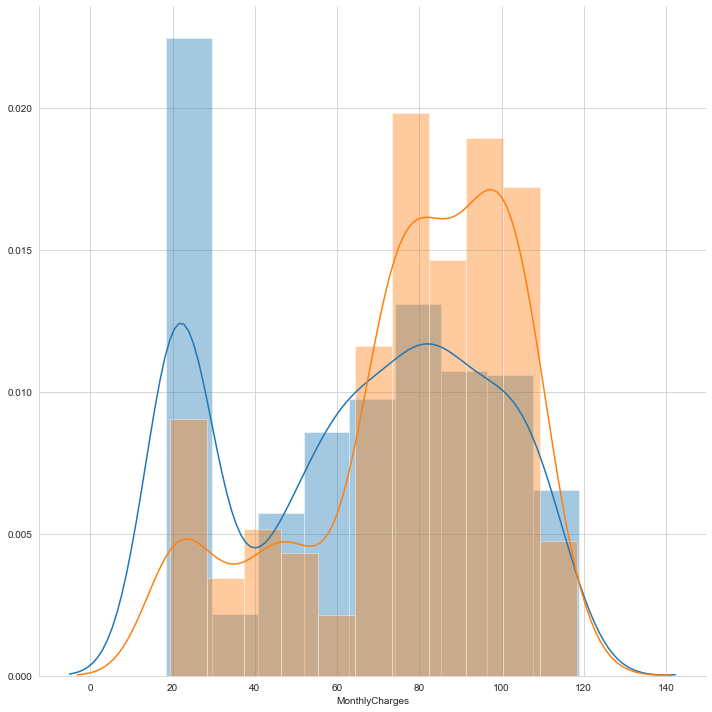

In [93]:
#2_d Scatter plot wiht color-coding for each feature type 
sns.set_style("whitegrid");
sns.FacetGrid(banktrans, hue="Churn", size=10) \
   .map(sns.distplot,"MonthlyCharges")
plt.show();

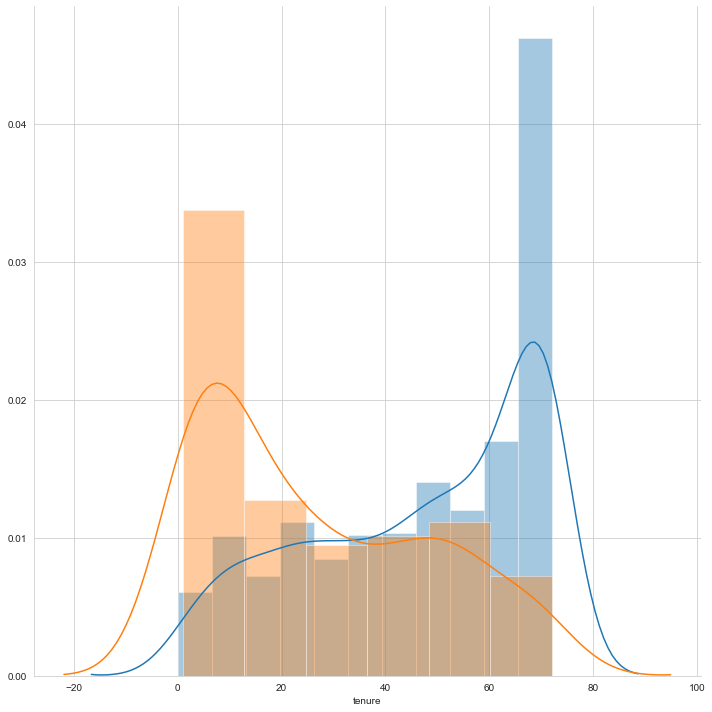

In [94]:
#2_d Scatter plot wiht color-coding for each feature type 
sns.set_style("whitegrid");
sns.FacetGrid(banktrans, hue="Churn", size=10) \
   .map(sns.distplot,"tenure")
plt.show();

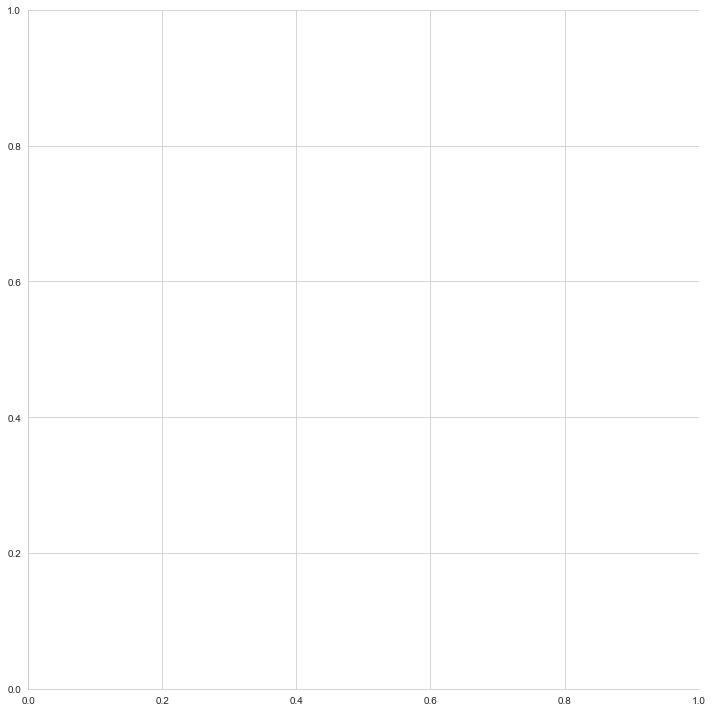

In [96]:
#2_d Scatter plot wiht color-coding for each feature type 
sns.set_style("whitegrid");
sns.FacetGrid(banktrans, hue="Churn", size=10) \
#   .map(sns.distplot,"TotalCharges") need to convert to int type 
plt.show();

In [7]:
df_tele.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [33]:
df_tele['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [66]:
df_tele['SeniorCitizen'].unique() 

array([0, 1], dtype=int64)

In [17]:
#df_tele['Partner'].unique()  

In [18]:
#df_tele['Dependents'].unique()    

In [19]:
#df_tele['PhoneService'].unique()  

In [20]:
#df_tele['MultipleLines'].unique()  

In [21]:
#df_tele['InternetService'].unique()  

In [22]:
#df_tele['OnlineSecurity'].unique()  

In [23]:
#df_tele['DeviceProtection'].unique()

In [24]:
#df_tele['TechSupport'].unique()

In [25]:
#df_tele['StreamingTV'].unique()

In [26]:
#df_tele['Churn'].value_counts()                  

In [30]:
PayMethod=df_tele['PaymentMethod']

print(PayMethod)

0                Electronic check
1                    Mailed check
2                    Mailed check
3       Bank transfer (automatic)
4                Electronic check
5                Electronic check
6         Credit card (automatic)
7                    Mailed check
8                Electronic check
9       Bank transfer (automatic)
10                   Mailed check
11        Credit card (automatic)
12        Credit card (automatic)
13      Bank transfer (automatic)
14               Electronic check
15        Credit card (automatic)
16                   Mailed check
17      Bank transfer (automatic)
18        Credit card (automatic)
19               Electronic check
20               Electronic check
21      Bank transfer (automatic)
22                   Mailed check
23        Credit card (automatic)
24        Credit card (automatic)
25      Bank transfer (automatic)
26               Electronic check
27               Electronic check
28        Credit card (automatic)
29            

In [38]:
is_2002 = df_tele['PaymentMethod']=="Bank transfer (automatic)"
# filter rows for year 2002 using  the boolean variable
banktrans= df_tele[is_2002]
print(banktrans.shape)
(142, 6)

(1544, 21)


(142, 6)

In [39]:
print(banktrans.head())

    customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
3   7795-CFOCW   Male              0      No         No      45           No   
9   6388-TABGU   Male              0      No        Yes      62          Yes   
13  0280-XJGEX   Male              0      No         No      49          Yes   
17  9959-WOFKT   Male              0      No        Yes      71          Yes   
21  1680-VDCWW   Male              0     Yes         No      12          Yes   

       MultipleLines InternetService       OnlineSecurity  ...  \
3   No phone service             DSL                  Yes  ...   
9                 No             DSL                  Yes  ...   
13               Yes     Fiber optic                   No  ...   
17               Yes     Fiber optic                  Yes  ...   
21                No              No  No internet service  ...   

       DeviceProtection          TechSupport          StreamingTV  \
3                   Yes                  Yes         